In [1]:
%matplotlib qt
import matplotlib.pyplot as plt

import os.path as op
import numpy as np
import mne

mne.set_log_level('WARNING')

subjects_dir = op.expanduser("~/data/pic-name-data-bids/MRI/")
res_dir = op.expanduser("~/research/results/picname")

In [2]:
def get_roi_labels(subject, subjects_dir, name):
    if name == "LO":
        labels = mne.read_labels_from_annot(subject, parc='aparc', subjects_dir=subjects_dir)
        ROI = ['lateraloccipital-lh', 'lateraloccipital-rh']
        labels_roi = []
        for lbl in labels:
            if lbl.name in ROI:
                print(lbl.name)
                labels_roi.append(lbl)
        label = labels_roi[0]
        for i in range(1, len(labels_roi)):
            label = label + labels_roi[i]
        return label
    return None

In [10]:
cond = "bili"
bili = [2, 8, 9, 12]
clil = [1, 6, 10, 11, 15]
mono = [3, 4, 5, 13, 14]
# subjects = ["sub-%02d" % i for i in (mono+bili)]

In [11]:
if cond == "bili":
    subjects = ["sub-%02d" % i for i in bili]
elif cond == "clil":
    subjects = ["sub-%02d" % i for i in clil]
elif cond == "mono":
    subjects = ["sub-%02d" % i for i in mono]
else:
    raise ValueError("$cond should be 'bili'/'clil'/'mono'.")
subjects

['sub-02', 'sub-08', 'sub-09', 'sub-12']

In [12]:
dom = {'sub-01': 'L',
       'sub-02': 'L',
       'sub-03': 'R',
       'sub-04': 'R',
       'sub-05': 'R',
       'sub-06': 'R',
       'sub-08': 'R',
       'sub-09': 'R',
       'sub-10': 'R',
       'sub-11': 'R',
       'sub-12': 'R',
       'sub-13': 'L',
       'sub-14': 'R',
       'sub-15': 'R',
      }

In [13]:
for sub in subjects:
    print(sub, dom[sub])

sub-02 L
sub-08 R
sub-09 R
sub-12 R


In [14]:
evokeds_list = []
for subject in subjects:
    fname = op.join(res_dir, subject, subject+'-ave.fif')
    ev = mne.read_evokeds(fname)
    evokeds_list.append(ev[0])

In [ ]:
# f, axes = plt.subplots(1, 3, figsize=(13, 9), sharex=True, sharey=True)
# for ax, subject, evoked in zip(axes.ravel(), subjects, evokeds_list):
#     evoked.plot(spatial_colors=True, gfp=True, proj=False, time_unit='ms', picks='mag',
#                 show=False, axes=ax, titles=subject) 
# plt.tight_layout()

# plt.savefig(op.join(res_dir, 'evoked_' + 'bili' + '.pdf'))

In [15]:
evoked_gave = mne.grand_average(evokeds_list)
# evoked_gave.plot(spatial_colors=True, gfp=True, proj=False, time_unit='ms', picks='mag')

# plt.savefig(op.join(res_dir, 'evoked_group_' + 'bili' + '.pdf'))

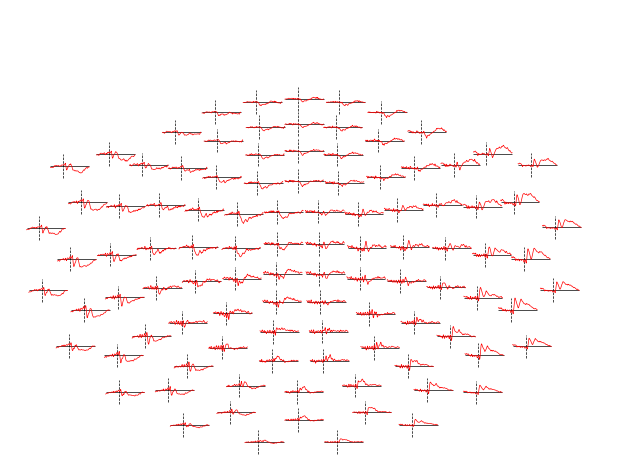

In [16]:
evoked_gave.pick_types(meg="mag").plot_topo(color='r', legend=False)

In [ ]:
# evkd = []
# for subject, evokeds in zip(subjects, evokeds_list):
#     mne.viz.plot_evoked(evokeds, picks='MEG2343', show=False, xlim=(-0.1,0.6))
# plt.show()

In [ ]:
stc_fnames = []
for subject in subjects:
    if dom[subject]=="L":
        stc_fnames.append(op.join(res_dir, subject + '/dspm_%s' % subject + '-lh.stc'))
    elif dom[subject]=="R":
        stc_fnames.append(op.join(res_dir, subject + '/dspm_%s' % subject + '-rh.stc'))
    else:
        raise ValueError("Check $dom. It can only have 'L'/'R' as values.")

stcs = [mne.read_source_estimate(stc_fname) for stc_fname in stc_fnames]

In [ ]:
# average_stc = np.mean(stcs)
# average_stc = np.mean(np.abs(stcs))

# vertno_peak, t_peak = average_stc.get_peak()
# print(t_peak)

# surfer_kwargs = dict(subject="fsaverage", hemi='both', subjects_dir=subjects_dir,
#         clim=dict(kind='value', lims=[2.5, 5, 6]), views='parietal',
#         initial_time=t_peak, time_unit='s', size=(800, 800), smoothing_steps=10,
#         time_viewer=False)

# brain = average_stc.plot(**surfer_kwargs)
# brain.add_text(0.1, 0.9, 'dSPM (with location of maximal activation)', 'title',
#               font_size=14)
# brain.add_foci(vertno_peak, coords_as_verts=True, hemi='lh', color='blue',
#               scale_factor=0.6, alpha=0.5)

# # Draw figure and save image
# dspm_fname = op.join(res_dir, "dspm_fsavg_bili_R.png")
# brain.save_image(dspm_fname)

# # Generate and save movie
# dspm_movie_fname = op.join(res_dir, 'dspm_movie_fsavg_bili_R.mov')
# brain.save_movie(dspm_movie_fname, tmin=0.05, tmax=0.55, interpolation='linear',
#                 time_dilation=20, framerate=10, time_viewer=True)
# brain.close()

In [ ]:
label = get_roi_labels('fsaverage', subjects_dir, "LO")
nstcs = 0
for stc in stcs:
    nstcs += 1
    if nstcs == 1:
        stc_label = stc.in_label(label)
        average_stc_label_mean = np.mean(stc_label.data, axis=0)
    else:
        stc_label = stc.in_label(label)
        average_stc_label_mean += np.mean(stc_label.data, axis=0)

average_stc_label_mean = average_stc_label_mean / nstcs

In [ ]:
times = stcs[0].times
plt.figure()
h = plt.plot(times, average_stc_label_mean, 'r', linewidth=3)
plt.xlim(times[0], times[-1])

plt.savefig(op.join(res_dir, 'evoked_label_' + cond + '.pdf'))